### Yolov6 Training on Custom Dataset

In [ ]:
import torch 
from IPython.display import Image

#### Clone the original yolov5 repo 

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12805, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 12805 (delta 48), reused 70 (delta 40), pack-reused 12719
Receiving objects: 100% (12805/12805), 12.42 MiB | 5.96 MiB/s, done.
Resolving deltas: 100% (8803/8803), done.


#### Copy ```dataset``` and ```.yaml``` to the woking directory and unzipping them.

```data.yaml``` 
    
> path to train and validation folders
    
> number of classes
    
> names of the classes

In [ ]:
!cp /content/drive/MyDrive/yolov5/dataset.zip ../

In [ ]:
!cp /content/drive/MyDrive/yolov5/data.yaml yolov5/data/

In [ ]:
!unzip ../dataset.zip -d ./

#### Start training process

Arguments:

        path to train.py file
        image size
        batch size
        no of epochs
        path to data.yaml file
        mentions the pre-trained model to be used for finetuning

In [ ]:
!python yolov5/train.py --img 416 --batch 16 --epochs 100 --data data.yaml --weights yolov5x.pt --cache

In [ ]:
## Copy the trained weights to drive
!cp -r /content/yolov5/runs/train/exp3 /content/drive/MyDrive/yolov5

#### Testing on images

In [ ]:
!python detect.py --source /content/drive/MyDrive/yolov5/273.jpg --weights /content/yolov5/runs/train/exp2/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/yolov5/273.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-305-g9cf5fd5 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 444 layers, 86180143 parameters, 0 gradients
Traceback (most recent call last):
  File "detect.py", line 256, in <module>
    main(opt)
  File "detect.py", line 251, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "detect.py", line 103, in run
    dataset

#### **Inference**

In [8]:
import torch
import matplotlib.pyplot as plt
import os
import numpy as np


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolov5/exp3/weights/last.pt', force_reload=True)

In [4]:
img = os.path.join('/content/drive/MyDrive/yolov5', '/content/drive/MyDrive/yolov5/273.jpg')

In [5]:
results = model(img)

In [6]:
results.print()

image 1/1: 1080x1920 1 license-plate, 2 vehicles
Speed: 78.9ms pre-process, 3818.8ms inference, 48.2ms NMS per image at shape (1, 3, 384, 640)


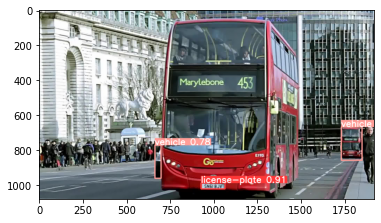

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

#### Testing on Video

In [ ]:
import cv2

cap = cv2.VideoCapture('/content/drive/MyDrive/yolov5/test_8.mp4')
writer = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc(*"MJPG"), 30,(1280,720))

while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    writer.write(np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
writer.release()
cv2.destroyAllWindows()
